In [13]:
# Run the tutorial in source directory and keep data in data directory 
# the  cell 1 after this cell  contain neccessary function to generate results
# main code start after this  

In [197]:
# Import  functions
from irls import *
from hoyer import *
from power_method import *
from fista import *

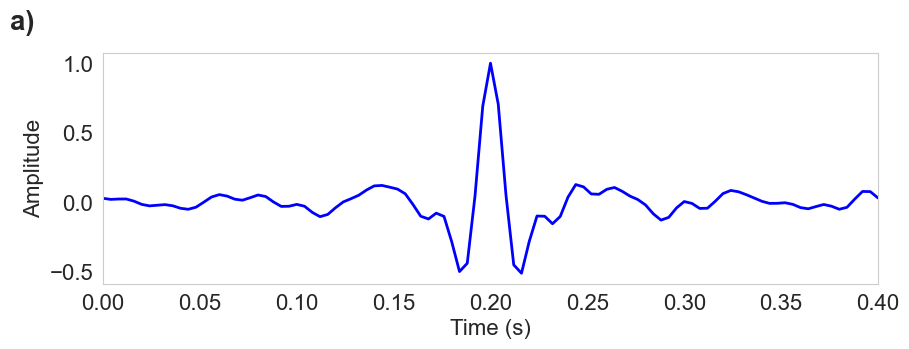

In [249]:
import os
from scipy.io import savemat,loadmat
import numpy as np
import matplotlib.pyplot as plt 
directory = '../data/teapot_2d_05_LD.mat'
filename = os.path.join(directory)
d= loadmat(filename)
# loading data and source wavelet 
data= d['Data']
w=d['w']
w=w.reshape((101,))
plt.rcParams["font.family"] = "Arial"
plt.rcParams['axes.labelsize'] = 16
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Create wavelet and the reflectivity series

fig, ax = plt.subplot_mosaic(
    [
        ["A", "A"]
    ],
    figsize = (10, 3)
)
ax["A"].plot(time_wav,w, color="blue", linewidth=2)
ax["A"].set_xlabel("Time (s)")
ax["A"].set_ylabel("Amplitude")
ax["A"].text(-0.12, 1.1, s="a)", transform=ax["A"].transAxes, fontsize="20", fontweight='bold')
ax["A"].set_xlim((0, 0.4))
ax["A"].grid(False)
# ax["A"].set_xticks(np.arange(0.0, 0.4, step=0.02))
plt.show() 


In [113]:
np.linspace(0.5, 4, 8)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

In [248]:
p=data.shape[0]
# print(max(data))
l_d=data.shape[0]
l_d

p=data.shape[0]
# print(max(data))
l_d=data.shape[0]
l_d

1101

In [133]:
import numpy as np
def toepn(p,wo):
    """
    input
    p=length of data vector
    wo= initial wavelet vector
    output
    A=toeplitz matrix of  sorce wavelet
    """
    q=len(wo)
    col=np.hstack((wo,np.zeros(p-q)))  #first column and first row of toeplitz matr
    row=np.hstack((wo[0],np.zeros(p-1)))
    from scipy.linalg import toeplitz
    A=toeplitz(col,row)
    return(A)
A=toepn(l_d,w)
A.shape
dim=A.shape[1]
x0=np.zeros(dim)

In [163]:
x_0=np.random.normal(0,1,(dim,1))
alpha=power_method(A,x_0,max_iter=15)
my_lambda=0.01
x_0.shape

(1101, 1)

# Solution for data by IRLS with CG ,FISTA,SD with HOYER SQUARED

In [165]:
m_sol_irls=0*data 
m_sol_fista=0*data 
m_sol_SD=0*data 
for i in range(207):
    d=data[:,i]
    x_sol_irls, itr=irls_cg(A, d, x0, 0.002, 50, 200)
    m_sol_irls[:,i]=x_sol_irls
    
    x_sol_fista,itr=fista(A, d, 0.05, 2*alpha, 1000)
    m_sol_fista[:,i]=x_sol_fista
    
    x_sol_SD,itr=SD_hoyer_squared(A, d, x0, .001, .1, max_iter=500, tol=1e-6)
    m_sol_SD[:,i]=x_sol_SD
    

# plt.imshow(m_sol_irls_final, cmap='seismic', aspect='auto', origin='upper')
# plt.show()


In [204]:
m_sol_irls_final=m_sol_irls[0:999,:] 
m_sol_fista_final=m_sol_fista[0:999,:] 
m_sol_SD_final=m_sol_SD[0:999,:] 

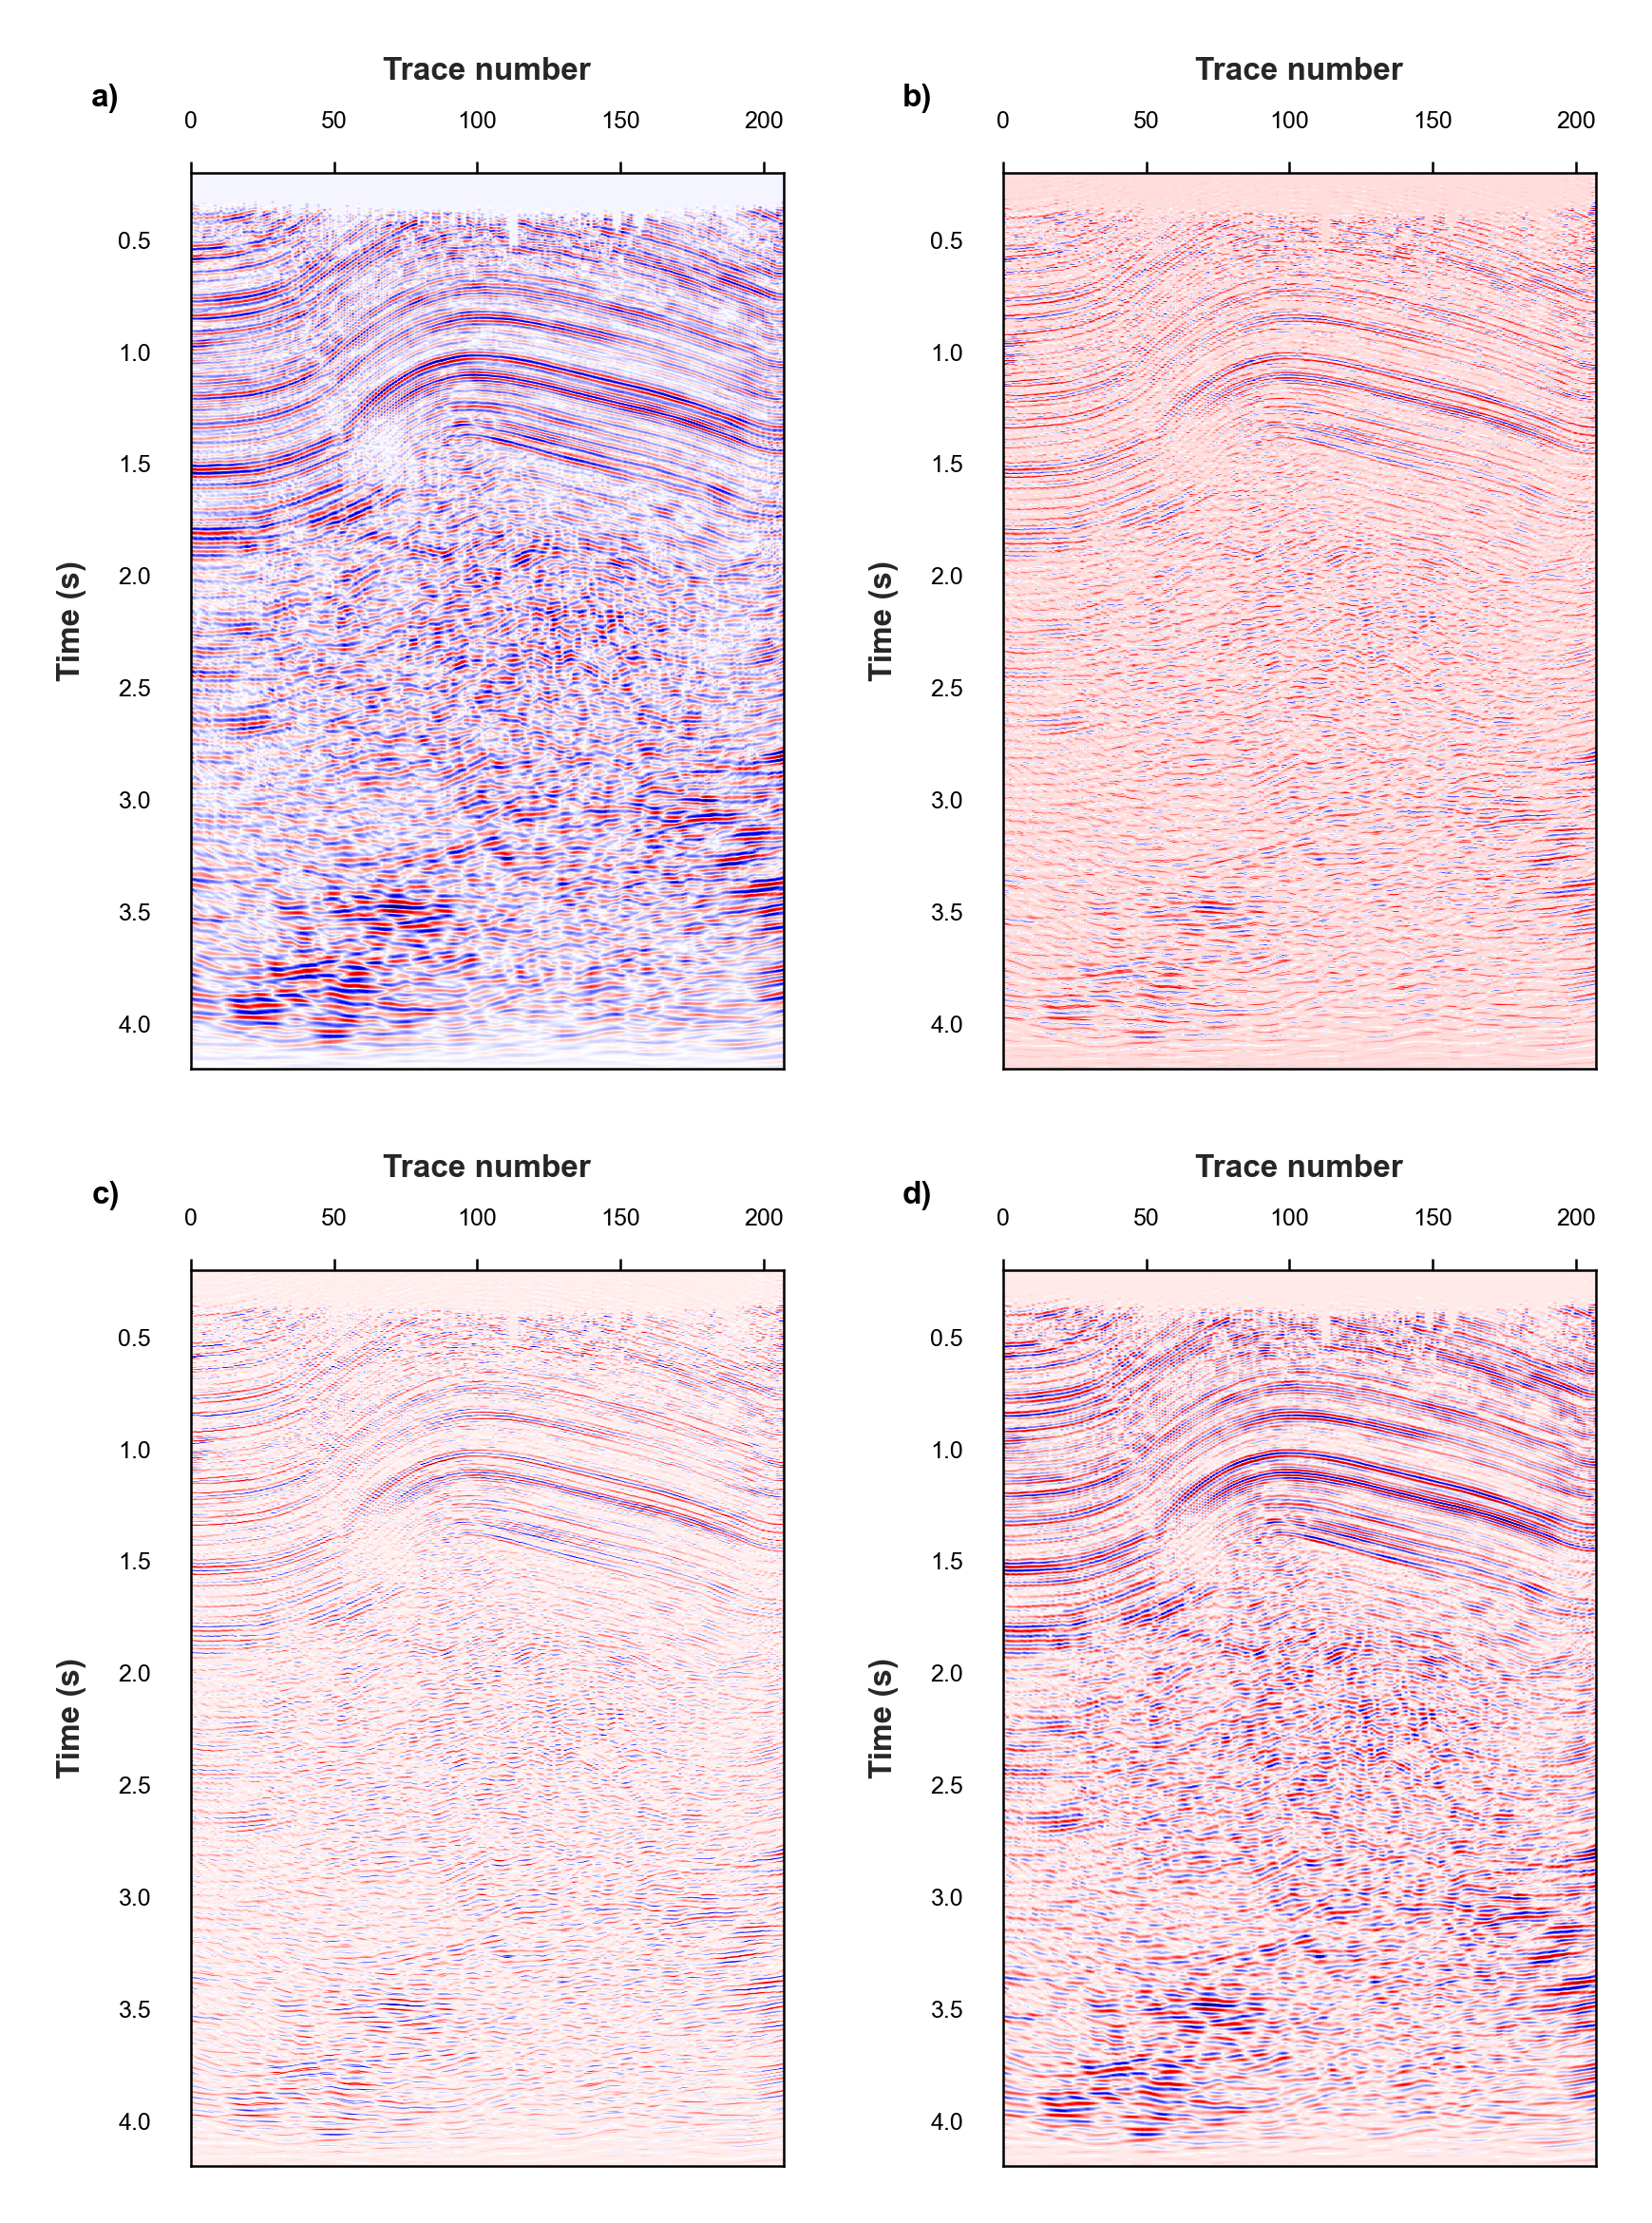

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
fig, ax = plt.subplots(2, 2, dpi=600, figsize=(3, 4), constrained_layout=True)  # 2x2 grid with vertical layout

tau = np.arange(0, 1000) * 0.004
y_ticks_offset = np.linspace(0.5, 4, 8)

# Function to format each subplot
def format_subplot(ax, data, label):
    im = ax.imshow(data, extent=[0, data.shape[1], 1050*0.004, 50*0.004], 
                   cmap='seismic', aspect='auto', origin='upper')
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel('Trace number', fontsize=4, fontweight='bold')
    ax.set_ylabel('Time (s)', fontsize=4, fontweight='bold')
    ax.set_yticks(y_ticks_offset)
    ax.tick_params(axis='both', direction='out', length=1.5, width=0.3, colors='black', labelsize=3)  
    
    # Add a black border around each subplot
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.3)

    ax.text(-0.12, 1.1, label, transform=ax.transAxes, fontsize=4, fontweight='bold',
            ha='right', va='top', color='black')
    ax.grid(False)  # Remove grid lines

# Apply formatting to all subplots
format_subplot(ax[0, 0], data[int(.2//0.004):l_d-int(.2//0.004)-1, :], 'a)')
format_subplot(ax[0, 1], m_sol_irls_final, 'b)')
format_subplot(ax[1, 0], m_sol_fista_final, 'c)')
format_subplot(ax[1, 1], m_sol_SD_final, 'd)')
plt.tight_layout()
save_dir = '../results/decon_2d/'
os.makedirs(save_dir, exist_ok=True)
dirt = os.path.join(save_dir, 'Reflectivity_2d_real.pdf')
plt.savefig(dirt, dpi=600, bbox_inches='tight')
plt.show()


In [250]:
from scipy.io import savemat
Data_time_corrected=data[int(.2//0.004):l_d-int(.2//0.004)-1,:]
fista_result_final=sol_fista[0:999,:]
SD_hoyer_final=SD_hoyer[0:999,:]
IRLS_final=m_sol_irls_final[0:999,:]
savemat('../results/decon_2d/Data_real.mat',{"Data":Data_time_corrected})
savemat('../results/decon_2d/IRLS_real.mat',{"IRLS":m_sol_irls_final})
savemat('../results/decon_2d/Fista_real.mat',{"fista":m_sol_fista_final})
savemat('../results/decon_2d/SD_Hoyer_squared_real.mat',{"SD_hoyer":m_sol_SD_final})